# Project: Investigate a Dataset - [tmdb-movies.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
    This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

    Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
    There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
    The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
### Dataset Description 

     We have dataset that we are going to analyze


### Question(s) for Analysis
    Question1: What are the top 20 famous actors?
    Question2: What are the top 20 famous genres?
    Question3: What are the top 20 famous production_companies?
    Question4: What are the top 20 famous director?
    Question5: What are the top 20 most popular films?
    Question6: What are the top 20 films makes profit?
    Question7: What is the average budget for each year, and what is the most budgeted period of time?
    Question8: What is the average revenue for each year, and what is the most budgeted period of time?
    Question9: What is the average profit for each year, and what is the most profit period of time?
    Question10: What is the average movie time per year, and what is the most average time period for movies?
    Question11: What is the number of films per year and what is the most time period in which the number of films?
    Question12: What is the most popular movie runtime by audience?
    Question13: What is the average vote for each year of release and what is the time period that you have received the
    most votes from the public?
    Question14: What is data distribution?
    Question15: Is there a correlation between the budget of the film and its popularity?
    Question16: Is there a correlation between the vote_average of the film and its popularity?
    Question17: Is there a correlation between the runtime of the film and its vote_average?  
    
    
    

In [1]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# import pakeges and load dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

    In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset 
    for analysis.  


### General Properties


In [3]:
# load DataSet
df = pd.read_csv('tmdb-movies.csv')


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [4]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Disply first 5 rows of data

In [5]:
df.shape

(10866, 21)

Data consists of 10866 rows and 21 columns

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


There is a problem in columns(budget, revenue,budget_adj and revenue_adj) min = 0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

There are a lot of missing values in homepage and tagline

In [8]:
# Number of missing value
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Disply missing values 

In [9]:
df.drop(labels=['imdb_id','homepage','tagline','keywords','overview','budget_adj','revenue_adj'],axis=1,inplace=True)

Remove colums that i will not ues to answer question

In [10]:
df.shape

(10866, 14)

In [11]:
df.duplicated().sum()

1

Check if there is any duplicated

In [12]:
df[df.duplicated()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
2090,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010


show duplicated row

In [13]:
df[df['id']==42194]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
2089,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010
2090,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010


They're the same if I'm going to delete one of them

##### Remove duplicates

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(10865, 14)

In [17]:
df = df[df['cast'].isnull()==False]
df = df[df['director'].isnull()==False]
df = df[df['genres'].isnull()==False]

remove null values from column cast and director and genres

In [18]:
df.production_companies.fillna('Null',inplace= True)

Fill null values in columns production_companies with Null

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10731 non-null  int64  
 1   popularity            10731 non-null  float64
 2   budget                10731 non-null  int64  
 3   revenue               10731 non-null  int64  
 4   original_title        10731 non-null  object 
 5   cast                  10731 non-null  object 
 6   director              10731 non-null  object 
 7   runtime               10731 non-null  int64  
 8   genres                10731 non-null  object 
 9   production_companies  10731 non-null  object 
 10  release_date          10731 non-null  object 
 11  vote_count            10731 non-null  int64  
 12  vote_average          10731 non-null  float64
 13  release_year          10731 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.2+ MB


In [20]:
df.isnull().sum().sum()

0

We make sure that there are no missing values

In [21]:
print('There are',df[df['budget'] == 0]['budget'].count(),'wrong values in budget coulmn')
print('There are',df[df['revenue'] == 0]['revenue'].count(),'wrong values in revenue column')
print('There are',df[df['runtime'] == 0]['runtime'].count(),'wrong values in runtime column')

There are 5578 wrong values in budget coulmn
There are 5888 wrong values in revenue column
There are 28 wrong values in runtime column


##### I can't delete the wrong values ​​because they are half of the data, so I'll replace them with the median of the data that doesn't have a zero

In [22]:
budget_median = df[df['budget'] != 0]['budget'].median()
revenue_median = df[df['revenue'] != 0]['revenue'].median()
runtime_median = df[df['runtime'] != 0]['runtime'].median()

##### I didn't replace it with the mean because it is affected by outliers

In [23]:
df.budget.replace(to_replace = 0, value = budget_median, inplace=True)
df.revenue.replace(to_replace = 0, value = revenue_median, inplace=True)
df.runtime.replace(to_replace = 0, value = runtime_median, inplace=True)

In [24]:
df[df['runtime']==0]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


We make sure that there are no 0 values

In [25]:
df['profit'] = df['revenue'] - df['budget']

Added a new feature which is profit

In [26]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
count,10731.000000,10731.000000,1.073100e+04,1.073100e+04,10731.000000,10731.000000,10731.000000,10731.000000,1.073100e+04
mean,65201.741869,0.652615,2.390019e+07,5.782948e+07,102.727146,219.812972,5.964710,2001.259622,3.392930e+07
std,91470.508056,1.004804,2.778681e+07,1.126152e+08,30.040664,578.815324,0.930283,12.820151,9.502169e+07
min,5.000000,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000,-4.139124e+08
25%,10547.500000,0.210765,1.750000e+07,3.191160e+07,90.000000,17.000000,5.400000,1995.000000,1.167944e+07
50%,20323.000000,0.387081,1.750000e+07,3.191160e+07,99.000000,39.000000,6.000000,2006.000000,1.441160e+07
75%,73948.500000,0.720889,1.750000e+07,3.191160e+07,112.000000,148.000000,6.600000,2011.000000,2.391160e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,2.544506e+09


We make sure the statistical data is correct

<a id='eda'></a>
## Exploratory Data Analysis

Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** 


In [27]:
# This function is created to plot bar type of Visulaitions

def show_barchart(dataframe,x_variable,y_variable, x_label, y_label, title):
    x = dataframe[x_variable]
    y = dataframe[y_variable].plot(kind='bar',figsize=(15,8),color ='DarkBlue',fontsize=13)
    plt.xlabel(x_label,fontsize=12)
    plt.ylabel(y_label,fontsize=13)
    plt.title(title,fontsize=15)
    plt.xticks(range(len(x)), x)
    plt.show()

In [28]:
# Create a line chart to visualize data
def show_linechart(x_variable, y_variable,color,title,xlable,ylable):
    df.groupby(x_variable)[y_variable].mean().plot.line(figsize=(15,5),color=color, alpha=0.9)
    plt.title(title,fontsize=15)
    plt.xlabel(xlable,fontsize=13)
    plt.ylabel(ylable,fontsize=12)
    plt.show()

In [29]:
# This function is created to count number of appearance of each element
def num_of_appearance(column):
    column_split = df[column].str.split('|')
    column_dict = dict()
    #cast = np.array(cast)
    for line in column_split:
        for word in line:
            if word not in column_dict:
                column_dict[word] = column_dict.get(word,0)+1
            else:
                column_dict[word] += 1
    
    sort_column = sorted(column_dict.items(), key=lambda x: x[1], reverse=True) 

    Data = pd.DataFrame(sort_column[:20],columns=['Item','Apear'])
    return Data

### Question1: What are the top 20 famous actors?

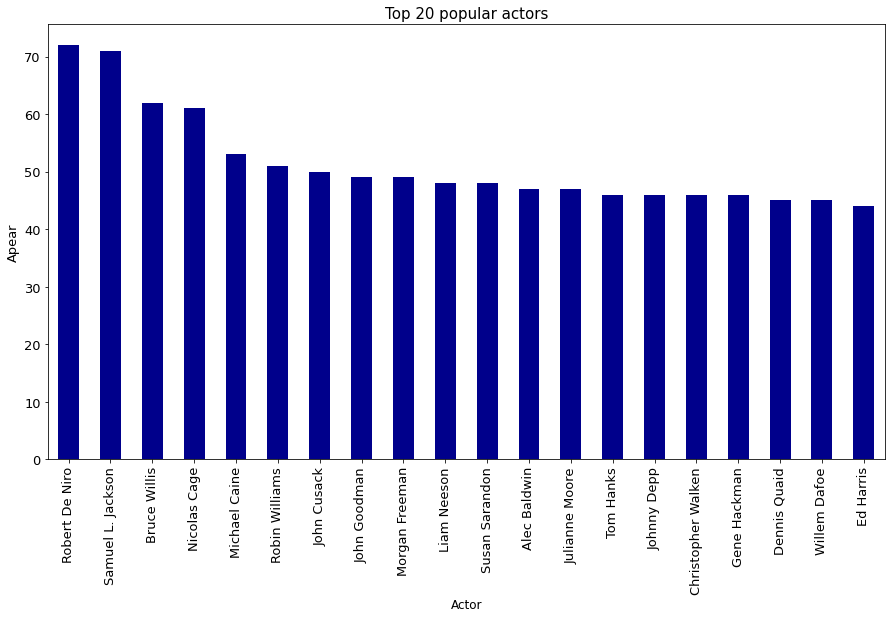

In [30]:
cast = num_of_appearance('cast')
show_barchart(cast,"Item",'Apear','Actor','Apear', "Top 20 popular actors")

### Question2: What are the top 20 famous genres?

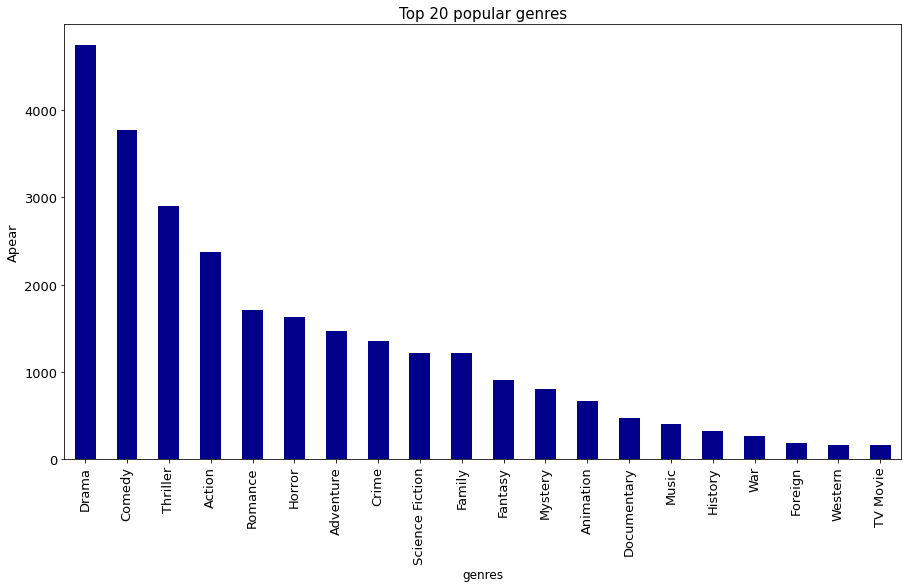

In [31]:
genres = num_of_appearance('genres')
show_barchart(genres,"Item",'Apear','genres','Apear', "Top 20 popular genres")

### Question3: What are the top 20 famous production_companies?

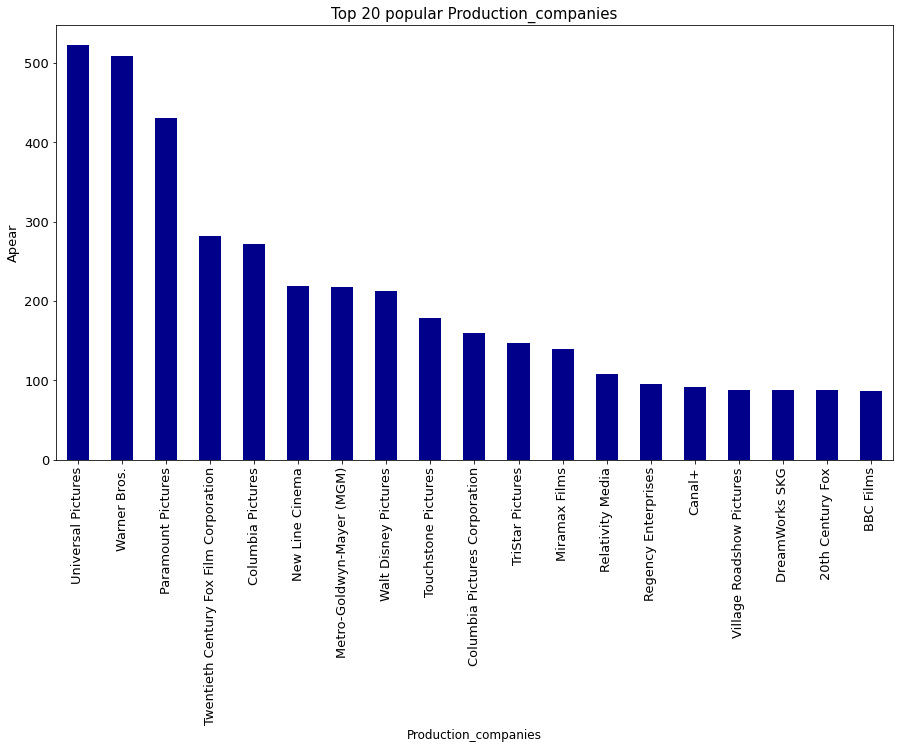

In [32]:
production_companies = num_of_appearance('production_companies')
show_barchart(production_companies[1:],"Item",'Apear','Production_companies','Apear', "Top 20 popular Production_companies")

### Question4: What are the top 20 famous director?

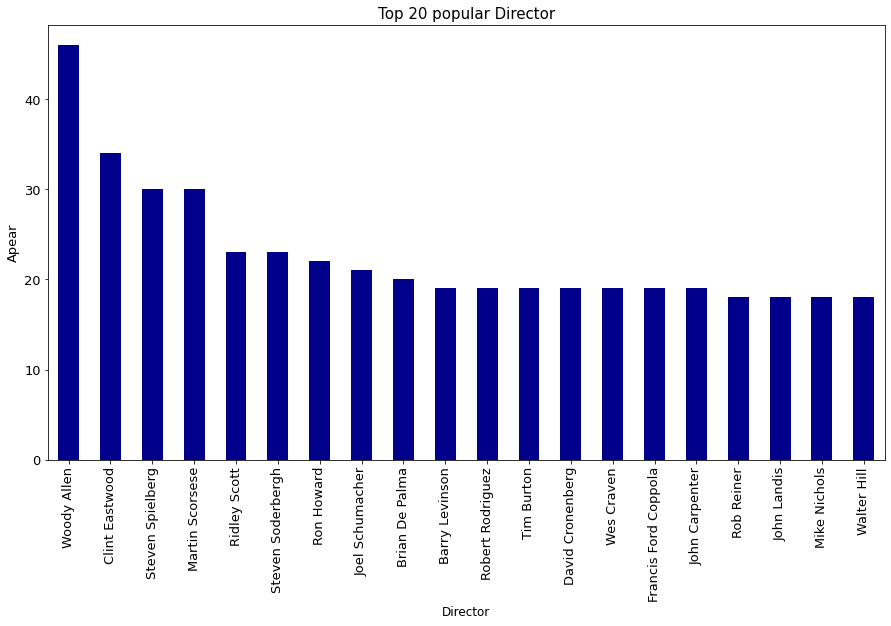

In [33]:
director = num_of_appearance('director')
show_barchart(director,"Item",'Apear','Director','Apear', "Top 20 popular Director")

### Question5: What are the top 20 most popular films?

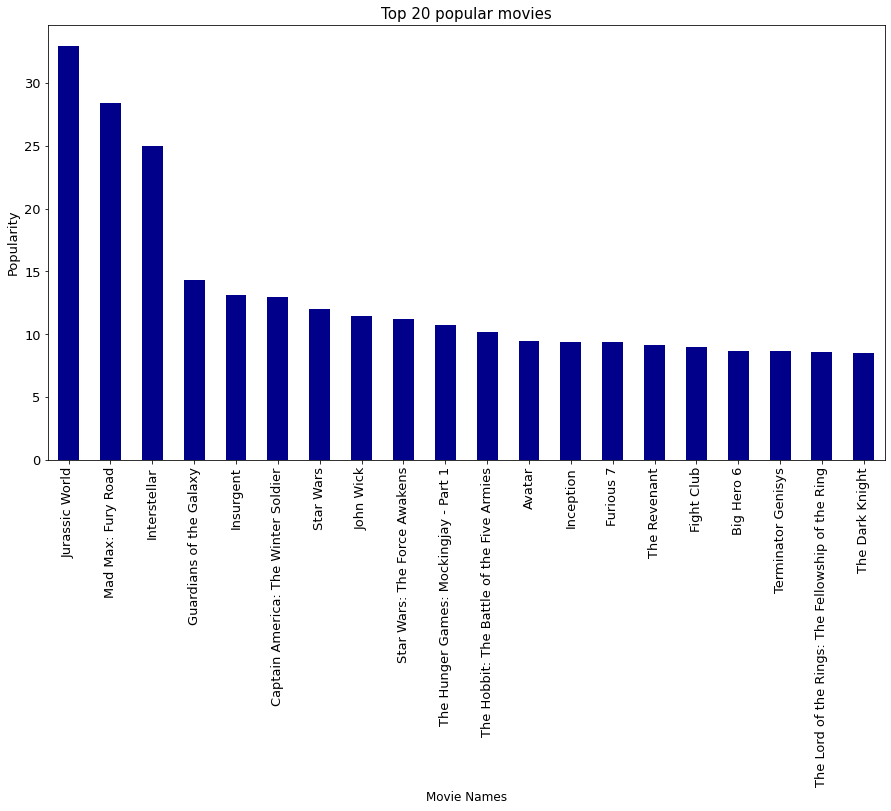

In [34]:
df_top20_popular = df.nlargest(n=20, columns=['popularity'])

show_barchart(df_top20_popular,"original_title",'popularity','Movie Names','Popularity', "Top 20 popular movies")

### Question6: What are the top 20 films makes profit?

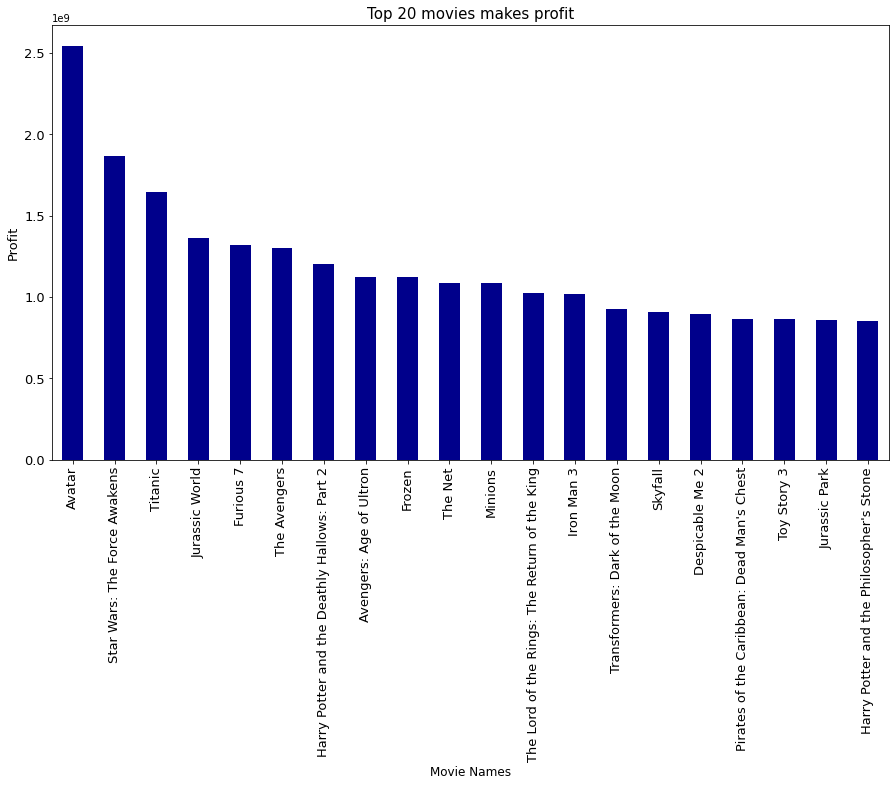

In [35]:
df_top20_profit = df.nlargest(n=20, columns=['profit'])

show_barchart(df_top20_profit,"original_title",'profit','Movie Names','Profit', "Top 20 movies makes profit")

#### Question7: What is the average budget for each year, and what is the most budgeted period of time?

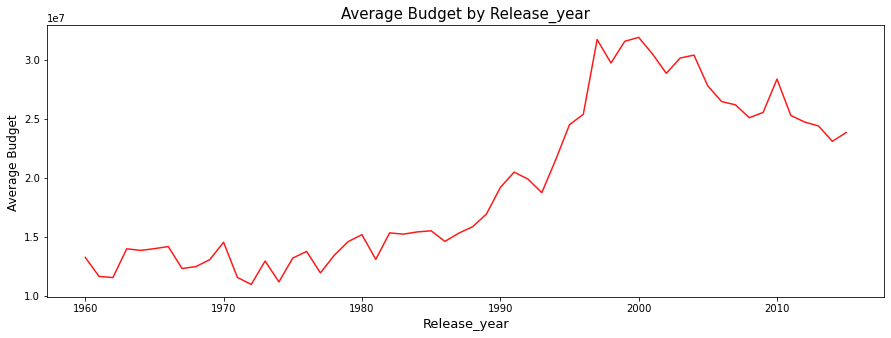

In [36]:
show_linechart('release_year','budget','red','Average Budget by Release_year','Release_year','Average Budget ')

the most budgeted period of time are from 1997 to 2004

### Question8: What is the average revenue for each year, and what is the most  revenue period of time?

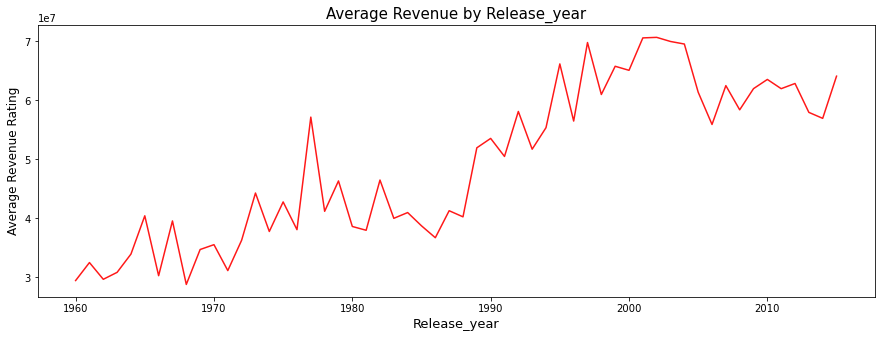

In [37]:
show_linechart('release_year','revenue','red','Average Revenue by Release_year','Release_year','Average Revenue Rating')

the most  revenue period of time are from 1995 to 2004

#### Question9: What is the average profit for each year, and what is the most profit period of time?

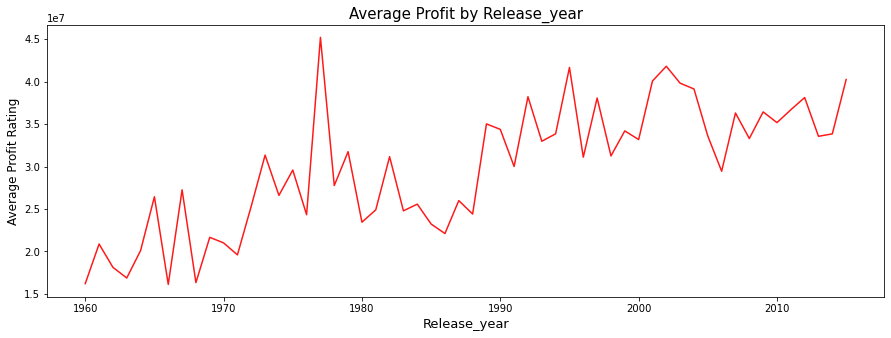

In [38]:
show_linechart('release_year','profit','red','Average Profit by Release_year','Release_year','Average Profit Rating')

##### This graph shows that the most profitable films are from 1976 to 1978, although Budget was little compared to the period from 2000 to 2015

### Question10: What is the average movie time per year, and what is the most average time period for movies?

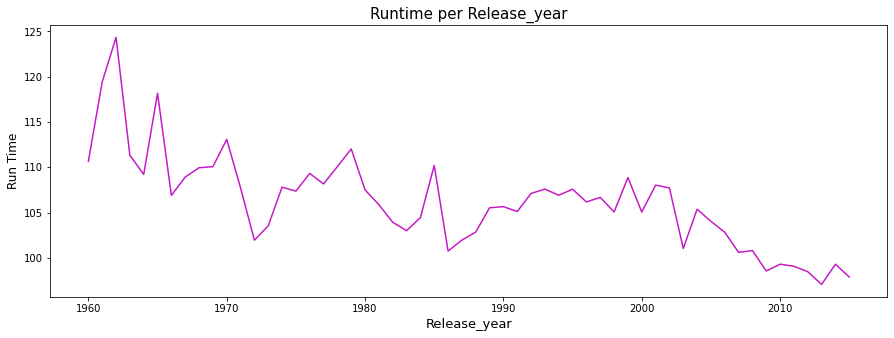

In [39]:
show_linechart('release_year','runtime','m','Runtime per Release_year','Release_year','Run Time')

the most average time period for movies are from 1961 to 1964
##### This graph shows the average time period for films in the 20th century is much larger than the 21th century, especially films in the sixties of the twentieth century

### Question11: What is the number of films per year and what is the most time period in which the number of films?

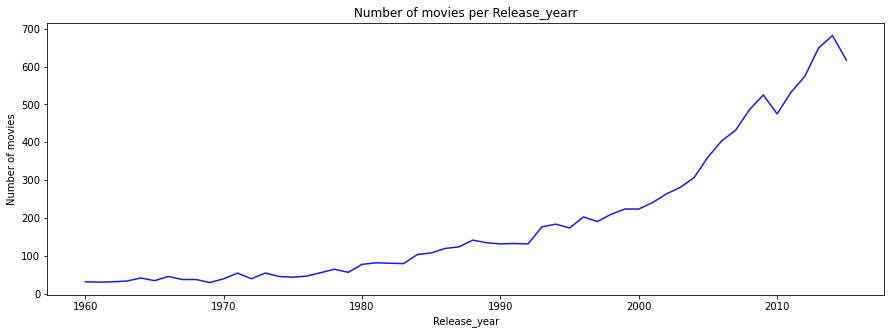

In [40]:
df.groupby('release_year')['id'].count().plot.line(figsize=(15,5),color='Blue', alpha=0.9);
plt.title('Number of movies per Release_yearr')
plt.xlabel('Release_year')
plt.ylabel('Number of movies');

##### This graph shows that the number of films has increased dramatically in the 21th century

### Question12: What is the most popular movie runtime by audience?

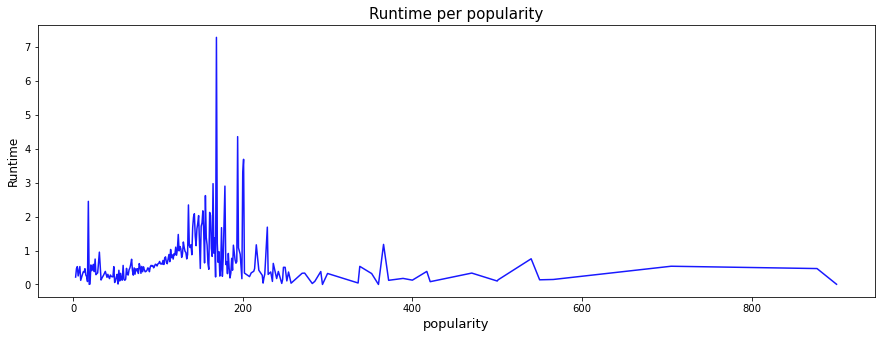

In [41]:
show_linechart('runtime','popularity','b','Runtime per popularity','popularity','Runtime')

###### The running time of the most popular movie by the audience is 180 minutes, which is 3 hours

### Question13: What is the average vote for each year of release and what is the time period that you have received the most votes from the public?

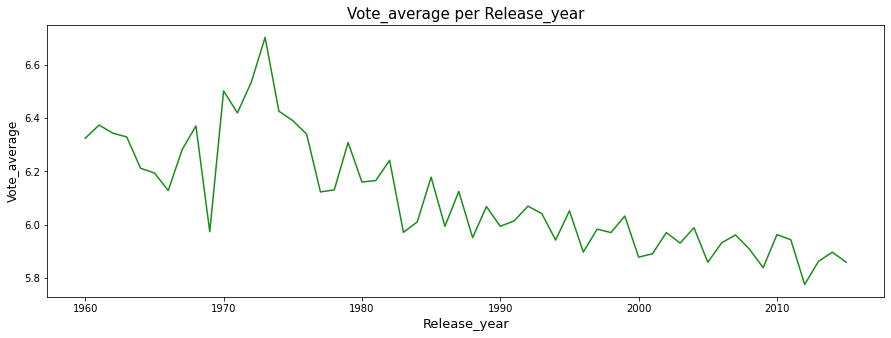

In [42]:
show_linechart('release_year','vote_average','g','Vote_average per Release_year','Release_year','Vote_average')

the time period that you have received the most votes from the public are from 1970 to 1975, and this graph shows that vote average of films per year has dencreased

### Question14: What is data distribution?

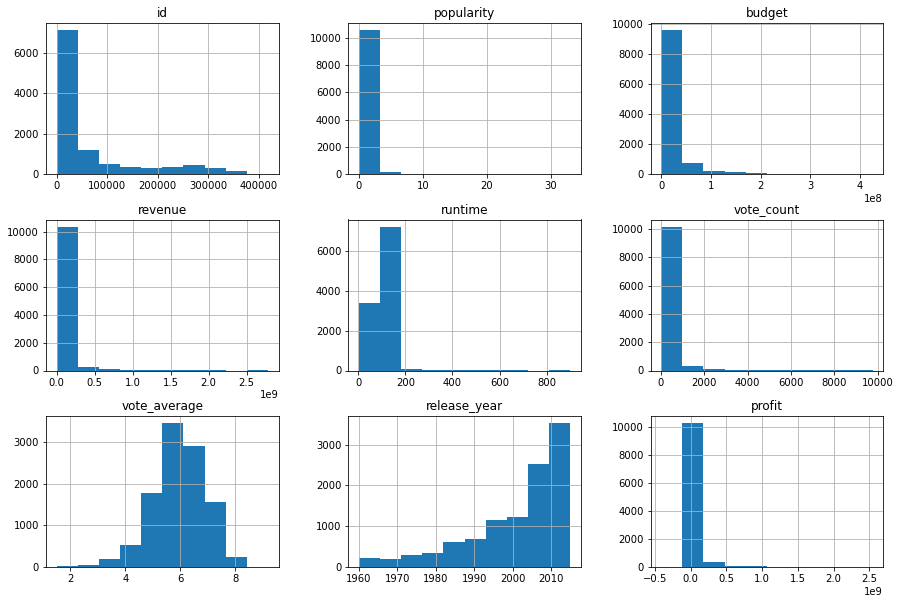

In [43]:
df.hist(figsize=(15,10));

The only one that has a normal distribution is vote_average

###  Question15: Is there a correlation between the budget of the film and its popularity?

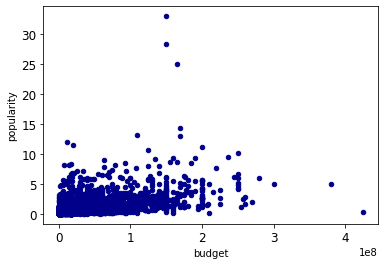

In [44]:
df.plot.scatter(x='budget',y='popularity',c='DarkBlue',fontsize=12);

There are a positive correlation between the budget of the film and its popularity

### Question16: Is there a correlation between the vote_average of the film and its popularity?

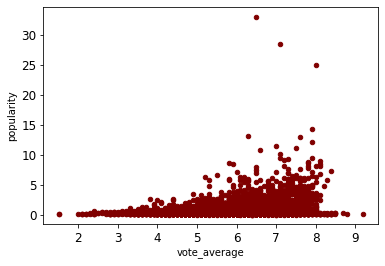

In [45]:
df.plot.scatter(x='vote_average',y='popularity',c='maroon',fontsize=12);

There are a positive correlation  between the vote_average of the film and its popularity

### Question17: Is there a correlation between the runtime of the film and its vote_average?

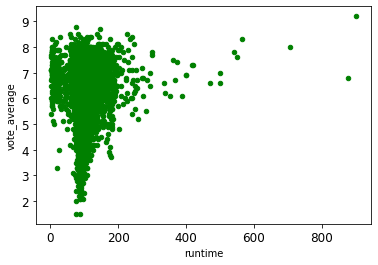

In [46]:
df.plot.scatter(x='runtime',y='vote_average',c='g',fontsize=12);

There are a positive correlation between the  runtime of the film and its vote_average

<a id='conclusions'></a>
## Conclusions

    Top 2 famous actor are Robert De Niro and Samuel L. Jackson
    Top 3 famous genres are Drama and  Comedy and Thriller	
    Top 3 famous are Woody Allen and Clint Eastwood and Steven Spielberg
    Top 3 famous production_companies are 
    Top 3 production_companies are Universal Pictures and Warner Bros and Paramount Pictures
    The most popular films are Jurassic World and Mad Max: Fury Road and Interstellar 
    The most films made profit are Avatar and Star Wars: The Force Awakens and Titanic
    The running time of the most popular movie by the audience is 180 minutes, which is 3 hours
    The most profitable films are from 1976 to 1978
    The higher the budget of the movie, the more popular it is

### limitations 
    The data contains many missing values.
    More than half of the two columns (budget, revenue) have a value of zero, which is a false value
    

In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1